In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
T=1000
dt=1

def brownian_motion(T, dt, mu, sigma):
    N = round(T/dt)
    t = np.linspace(0, T, N)
    W = np.random.normal(loc=mu, scale=sigma, size = N)
    W = np.cumsum(W)*np.sqrt(dt) ### standard brownian motion ###
    return W

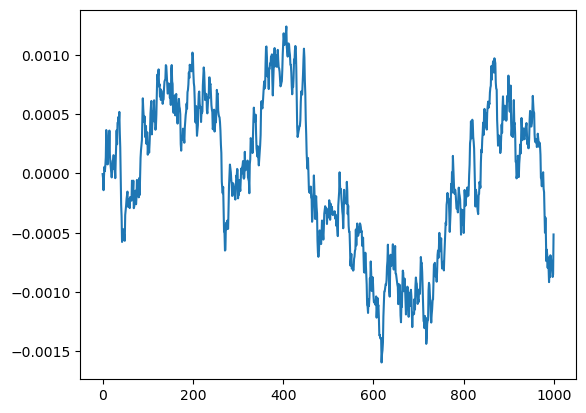

In [3]:
W = brownian_motion(T=T, dt=dt, mu=0, sigma=0.0001)
plt.plot(W)

In [4]:
def geometric_brownian_motion(T, mu, sigma, S0, dt):
        """
        Start = 20
        t, S = GeometricBrownianMotion(T=1000, mu=0.000, sigma=0.04, S0=Start, dt=1)
        """
        N = round(T/dt)
        t = np.linspace(0, T, N)
        W = np.random.standard_normal(size = N)
        W = np.cumsum(W)*np.sqrt(dt) ### standard brownian motion ###
        X = (mu-0.5*sigma**2)*t + sigma*W
        S = S0*np.exp(X) ### geometric brownian motion ###
        return t, S

In [5]:
T = 1000
dt = 1
mu_ = brownian_motion(T=T, dt=dt, mu=0.000000, sigma=0.0001)
t, sigma_ = geometric_brownian_motion(T=T, mu=0, sigma=0.01, S0=0.06, dt=1)
t, S = geometric_brownian_motion(T=T, mu=mu_, sigma=sigma_, S0=20, dt=1)

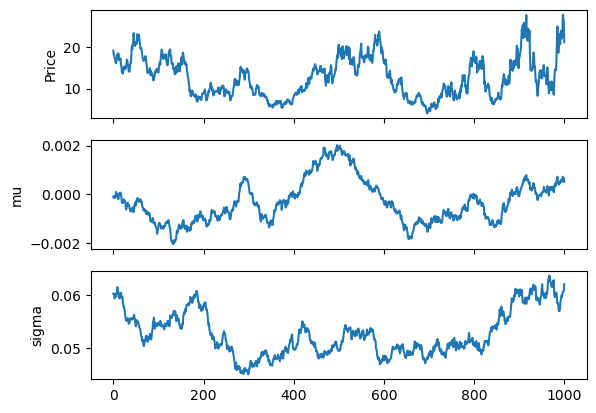

In [6]:
fig, axs = plt.subplots(3)

axs[0].plot(t, S)
axs[0].set_ylabel('Price')
axs[1].plot(t, mu_)
axs[1].set_ylabel('mu')
axs[2].plot(t, sigma_)
axs[2].set_ylabel('sigma')

for ax in axs.flat:
    ax.label_outer()


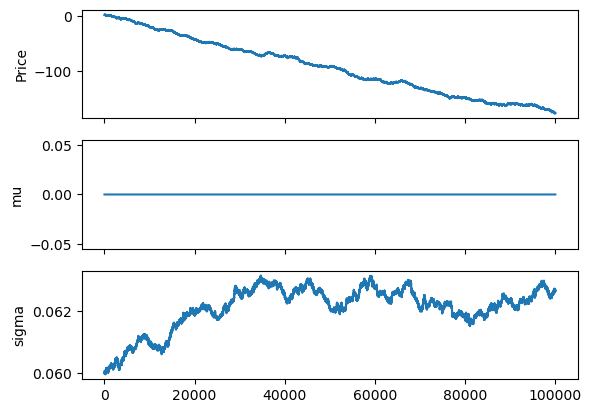

In [7]:
T = 100000
dt = 1
mu_ = brownian_motion(T=T, dt=dt, mu=0.000000, sigma=0.00000)
t, sigma_ = geometric_brownian_motion(T=T, mu=0, sigma=0.0001, S0=0.06, dt=1)
t, S = geometric_brownian_motion(T=T, mu=mu_, sigma=sigma_, S0=20, dt=1)
fig, axs = plt.subplots(3)

axs[0].plot(t, np.log(S))
axs[0].set_ylabel('Price')
axs[1].plot(t, mu_)
axs[1].set_ylabel('mu')
axs[2].plot(t, sigma_)
axs[2].set_ylabel('sigma')

for ax in axs.flat:
    ax.label_outer()

In [30]:
paths = 1000
T = 1000

all_sigmas = np.zeros((paths, T))
all_mus = np.zeros((paths, T))
all_paths = np.zeros((paths, T))

for i in range(0, paths):
    mu_ = brownian_motion(T=T, dt=dt, mu=0.000000000, sigma=0.00005)
    all_mus[i,:] = mu_

for i in range(0, paths):
    t, sigma_ = geometric_brownian_motion(T=T, mu=0, sigma=0.01, S0=0.1, dt=1)
    all_sigmas[i,:] = sigma_


for i in range(0, paths):
    t, S = geometric_brownian_motion(T=T,
                                     mu=all_mus[i],
                                     sigma=all_sigmas[i],
                                     S0=20, dt=1)
    all_paths[i,:] = S

print(all_paths)

[[1.94669524e+01 2.62623513e+01 2.76621956e+01 ... 1.09278232e-03
  1.26056951e-03 1.04143516e-03]
 [2.11303725e+01 2.15780226e+01 2.05612407e+01 ... 9.44702680e-02
  7.08287309e-02 5.67295275e-02]
 [1.73397810e+01 1.78070894e+01 1.55035578e+01 ... 1.04765719e-07
  1.36136149e-07 2.12045751e-07]
 ...
 [1.95125941e+01 2.11120585e+01 2.07420563e+01 ... 6.62663806e-02
  6.00435358e-02 5.97970887e-02]
 [2.19974509e+01 2.25808726e+01 2.49300968e+01 ... 4.80442473e-01
  5.05064895e-01 5.13169596e-01]
 [2.15723576e+01 1.85842437e+01 1.74409018e+01 ... 4.02714705e-02
  3.71048531e-02 4.22204182e-02]]


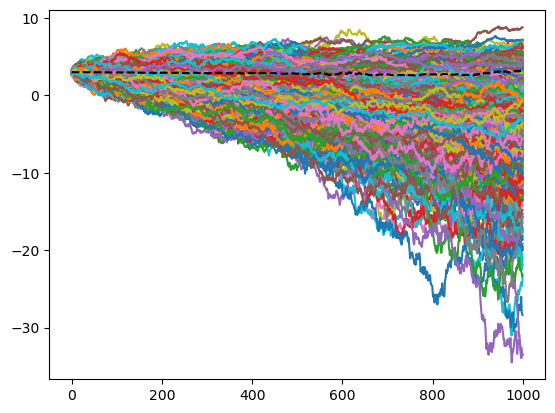

In [31]:
mean_ = np.mean(all_paths, axis=0)

for i in all_paths:
    plt.plot(np.log(i))
plt.plot(np.log(mean_), color='black', linestyle='--')
plt.show()